![](https://storage.googleapis.com/kaggle-datasets-images/418634/799874/ea245b9a5d88ab36acb0eb59864b7d92/dataset-cover.png?t=2019-11-17-21-16-09)

**Our task is to improve a dataset that is being used to train a random forest model.
The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e21/sample_submission.csv


In [2]:
filename = "/kaggle/input/playground-series-s3e21/sample_submission.csv"
data = pd.read_csv(filename)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head(10)

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.430,7.150,0.180,0.200,0.650,14.515,5.845,1.285,0.429,0.030,0.050,0.064,0.730,1.075,0.056,0.567,0.400,1.500,1.560,19.355,4.950,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.070,7.150,1.107,1.027,1.848,8.625,12.175,0.280,0.440,0.089,1.360,0.064,0.902,1.454,0.056,0.190,2.347,5.105,2.095,19.355,20.050,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.070,7.150,0.020,0.020,0.650,17.144,24.645,0.380,0.440,0.060,0.050,0.082,0.902,2.025,0.056,0.567,1.700,1.700,3.960,4.900,4.580,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.670,6.670,0.280,0.270,1.730,3.870,8.410,1.480,1.380,0.050,0.050,0.070,0.530,1.740,0.050,0.064,1.500,1.500,2.020,3.960,8.450,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.070,7.150,0.360,0.435,0.650,3.850,5.845,0.280,0.440,0.105,0.115,0.074,1.252,1.075,0.071,0.190,1.050,1.150,2.095,3.902,2.020,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.500,3.90
5,5,8.12,9.000,9.00,11.475,9.115,8.110,8.980,6.375,0.240,0.245,0.650,3.850,5.845,0.280,0.440,0.050,0.060,0.070,0.220,1.075,0.071,0.064,4.200,1.990,14.670,19.355,20.050,0.190,1.800,2.520,1.72,4.725,6.075,8.400,2.155,4.40
6,6,8.12,7.500,8.50,9.000,9.115,6.025,9.805,5.030,0.300,0.300,1.640,0.515,16.645,1.285,1.570,0.050,0.060,0.134,0.902,1.454,0.056,0.567,0.090,0.120,14.670,19.355,20.050,2.095,1.800,7.650,4.10,2.040,4.950,16.645,3.500,1.83
7,7,7.65,7.350,8.10,9.545,9.115,6.025,8.980,7.150,0.300,0.300,1.640,3.850,5.845,0.280,0.440,0.070,0.105,0.134,0.220,1.075,0.056,0.567,1.555,1.620,2.095,19.355,2.020,0.636,8.320,4.700,3.97,3.950,3.300,8.400,3.500,3.70
8,8,6.40,6.400,8.40,8.370,7.890,5.075,10.070,5.030,0.240,0.200,0.650,2.800,12.175,0.380,0.429,0.030,0.006,0.064,0.220,1.075,0.056,0.071,1.600,1.300,12.090,7.450,7.795,6.760,8.320,3.500,4.50,7.900,6.075,8.400,5.725,7.50
9,9,9.38,7.400,8.40,9.545,7.600,4.000,9.805,5.030,0.140,0.200,1.640,4.280,18.300,0.280,0.429,0.060,0.070,0.208,0.660,0.746,0.056,0.567,0.090,0.120,3.960,4.900,4.580,3.020,3.020,8.600,6.70,4.725,8.400,8.415,6.625,4.14


In [3]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# 1. EDA

In [4]:
print(data.shape)

(3500, 37)


In [5]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['missing#'] = df.isna().sum().values*100
    summ['missing%'] = (df.isna().sum().values*100)/len(df)
    summ['uniques'] = df.nunique().values
    summ['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    summ['min'] = desc['min']
    summ['max'] = desc['max']
    summ['mean'] = desc['mean']
    return summ

summary(data).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
id,int64,0,0.000000,3500,3500,0.000000,3499.000000,1749.500000
target,float64,0,0.000000,462,3500,1.300000,65.930000,8.473834
O2_1,float64,0,0.000000,329,3500,0.000000,46.950000,8.216993
O2_2,float64,0,0.000000,258,3500,0.000000,65.950000,9.291581
O2_3,float64,0,0.000000,235,3500,4.900000,16.900000,9.633064
O2_4,float64,0,0.000000,241,3500,2.300000,21.800000,8.065733
O2_5,float64,0,0.000000,317,3500,0.200000,59.400000,5.671581
O2_6,float64,0,0.000000,238,3500,0.000000,40.190000,9.461363
O2_7,float64,0,0.000000,303,3500,0.000000,15.900000,6.547433
NH4_1,float64,0,0.000000,152,3500,0.020000,4.200000,0.340525


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_20/2467141928.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


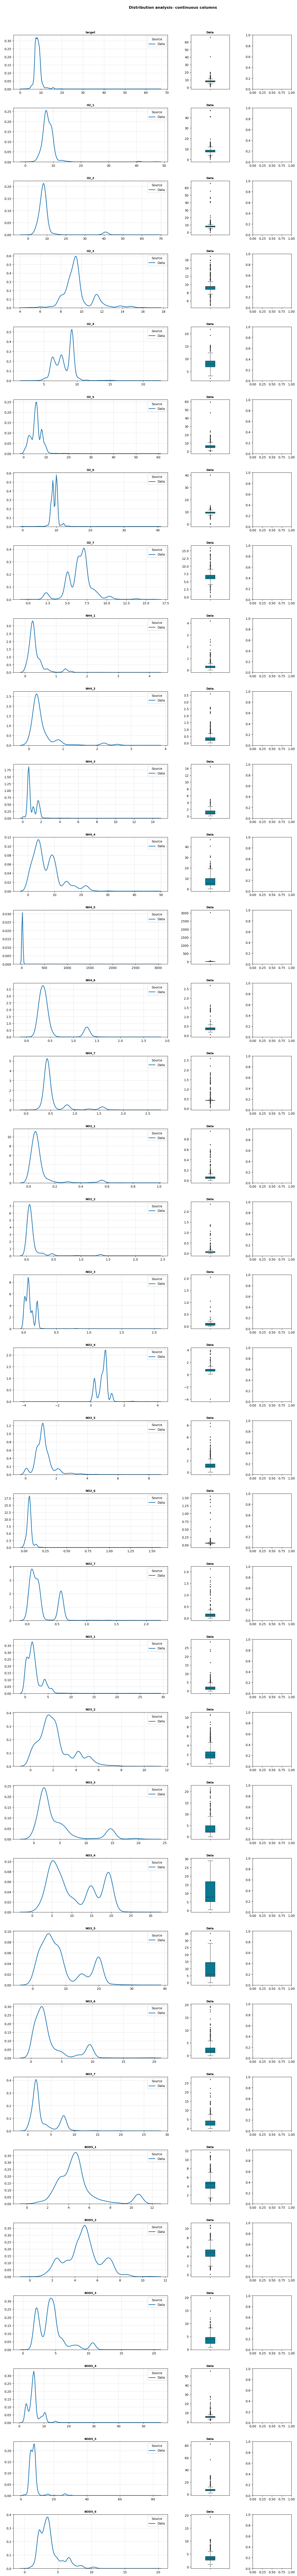

In [7]:
#from YANG ZHOU: https://www.kaggle.com/code/yaaangzhou/en-playground-s3-e20-eda-modeling#-0.-Imports-
num = data.columns.tolist()[1:-1]
df = data.copy().assign(Source = 'Data')
def Distribution_analysis(df):
    fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4.2), 
                             gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]});

    for i,col in enumerate(num):
        ax = axes[i,0];
        sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', ax = ax, linewidth = 2.1)
        ax.set_title(f"\n{col}",fontsize = 9, fontweight= 'bold');
        ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75);
        ax.set(xlabel = '', ylabel = '');
        ax = axes[i,1];
        sns.boxplot(data = df.loc[df.Source == 'Data', [col]], y = col, width = 0.25,saturation = 0.90, linewidth = 0.90, fliersize= 2.25, color = '#037d97',
                    ax = ax);
        ax.set(xlabel = '', ylabel = '');
        ax.set_title(f"Data",fontsize = 9, fontweight= 'bold');

    plt.suptitle(f"\nDistribution analysis- continuous columns\n",fontsize = 12, fontweight= 'bold',
                 y = 0.89, x = 0.57);
    plt.tight_layout();
    plt.show();
Distribution_analysis(df)

**I can be wrong (im a novice), but there is a lot of outliers in the dataset, so im gonna try to delete them before augmentation of this data and see the results of it after submition. (If you have some advices, please share them in the discussion section!)**

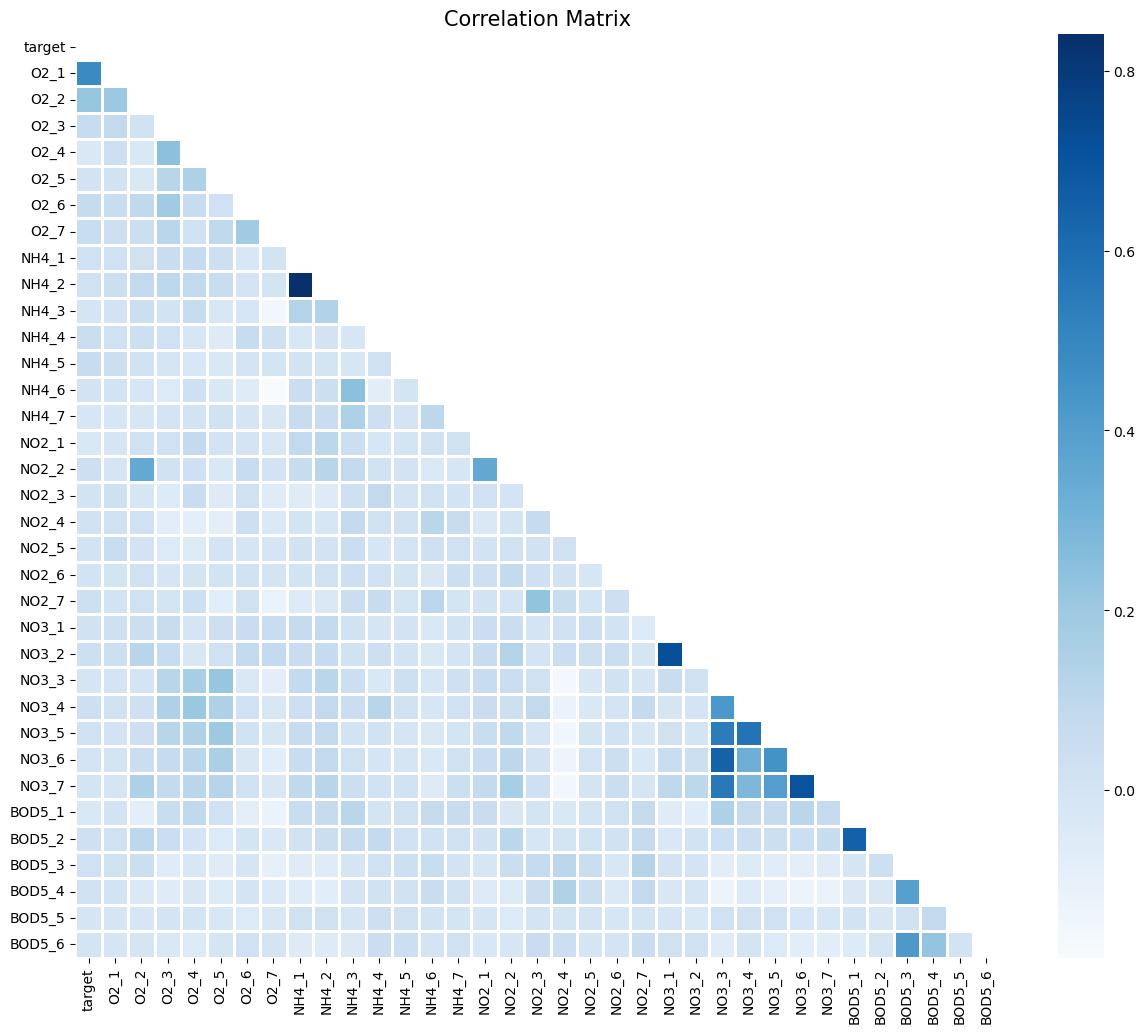

In [8]:
def correlate_df(df):
    num = data.columns.tolist()[1:-1]
    corr_matrix = data[num].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='Blues', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()
correlate_df(data)

# 2. Delete outliers

In [9]:
# Interquartile range method (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

# Replace outliers with median
data_no_outliers = data.copy()
for column in data.columns:
    median = data[column].median()
    data_no_outliers[column] = data[column].apply(lambda x: median if x < lower_bound[column] or x > upper_bound[column] else x)

# Standardization and Z-score
from scipy.stats import zscore

data_standardized = data.apply(zscore)

# Removing values that are far from the average (by Z-score)
data_no_outliers = data[(data_standardized >= -3) & (data_standardized <= 3)]

/tmp/ipykernel_20/2467141928.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


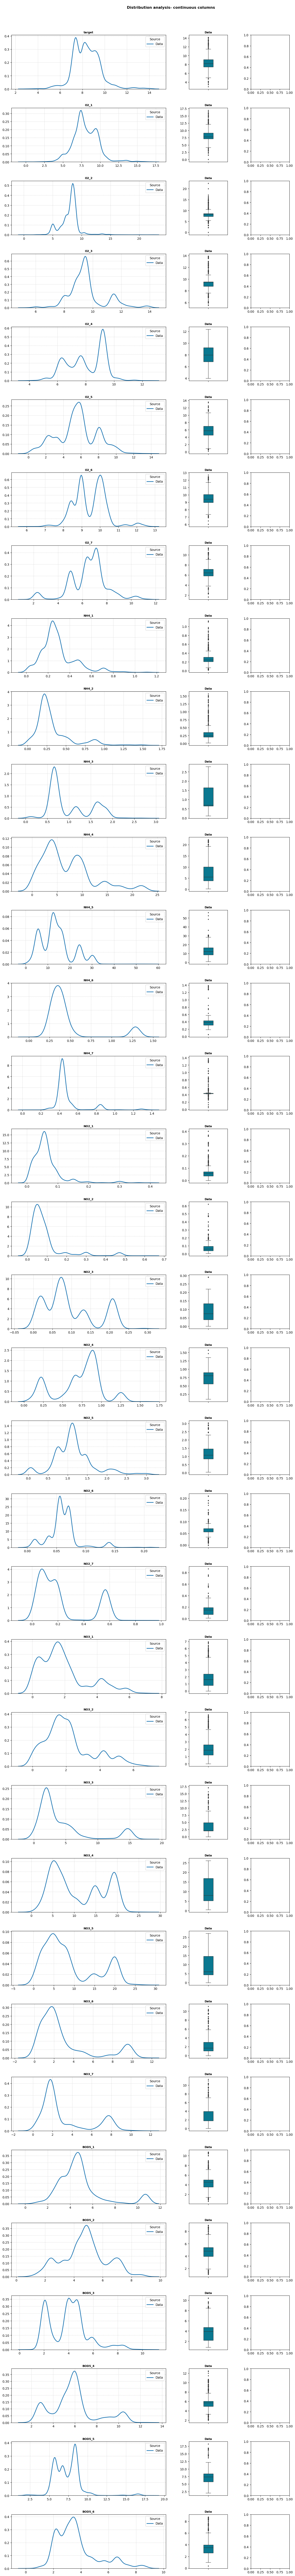

In [10]:
df_2 = data_no_outliers.copy().assign(Source = 'Data')
Distribution_analysis(df_2)

In [11]:
summary(data_no_outliers).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
id,int64,0,0.000000,3500,3500,0.000000,3499.000000,1749.500000
target,float64,4700,1.342857,438,3453,2.990000,14.120000,8.363753
O2_1,float64,2000,0.571429,324,3480,0.000000,16.900000,8.028331
O2_2,float64,14300,4.085714,251,3357,0.000000,22.433000,7.926551
O2_3,float64,6600,1.885714,215,3434,5.520000,13.900000,9.553971
O2_4,float64,3300,0.942857,221,3467,4.000000,12.400000,8.010563
O2_5,float64,2700,0.771429,295,3473,0.200000,13.545000,5.560733
O2_6,float64,4300,1.228571,211,3457,6.050000,12.700000,9.450448
O2_7,float64,3400,0.971429,285,3466,1.640000,11.370000,6.494783
NH4_1,float64,16300,4.657143,133,3337,0.020000,1.127000,0.289334


**After deleting all of the outliers we need either to delete rows with NaN's, or impute them. Im gonna try to impute**
**. Also i noticed that i deleted some of the "target" column values, i dont know how will it effect the final result or is it a mistake, lets see**

# 3. Impute missing values

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data_no_outliers)
data_imputed_df = pd.DataFrame(data_imputed, columns=data_no_outliers.columns)
data_imputed_df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0.0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,3.950,10.465,16.645,5.75,3.70
1,1.0,9.10,13.533,8.30,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2.0,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3.0,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4.0,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [13]:
summary(data_imputed_df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
id,float64,0,0.000000,3500,3500,0.000000,3499.000000,1749.500000
target,float64,0,0.000000,438,3500,2.990000,14.120000,8.361689
O2_1,float64,0,0.000000,324,3500,0.000000,16.900000,8.027026
O2_2,float64,0,0.000000,251,3500,0.000000,22.433000,7.941809
O2_3,float64,0,0.000000,215,3500,5.520000,13.900000,9.552953
O2_4,float64,0,0.000000,221,3500,4.000000,12.400000,8.010275
O2_5,float64,0,0.000000,295,3500,0.200000,13.545000,5.562501
O2_6,float64,0,0.000000,211,3500,6.050000,12.700000,9.450197
O2_7,float64,0,0.000000,285,3500,1.640000,11.370000,6.494154
NH4_1,float64,0,0.000000,133,3500,0.020000,1.127000,0.287362


In [14]:
data_imputed_df.shape

(3500, 37)

# 4. Standartization

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_for_scaling = data_imputed_df.pop("target")
df_scaled = scaler.fit_transform(data_imputed_df)

df_scaled_pd = pd.DataFrame(df_scaled, columns=data_imputed_df.columns)
df_scaled_pd.insert(1, 'target', df_for_scaling)

# 5. Save and submit

In [16]:
df_scaled_pd['id'] = 0

In [17]:
df_scaled_pd.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,0.443787,0.401195,0.480310,0.626786,0.592731,0.357895,0.566290,0.144535,...,0.181663,0.155439,0.158520,0.417572,0.265075,0.324607,0.807656,0.901109,0.642261,0.315789
1,0,9.10,0.800769,0.369991,0.387828,0.626786,0.435744,0.604511,0.566290,0.981933,...,0.740798,0.860747,0.677675,0.392892,0.742462,0.124607,0.303828,0.228281,0.308371,0.094737
2,0,8.21,0.219527,0.241608,0.387828,0.626786,0.325965,0.604511,0.566290,0.000000,...,0.167963,0.272538,0.348745,0.430898,0.491206,0.405759,0.387560,0.291436,0.373957,0.236090
3,0,8.39,0.514793,0.361075,0.474940,0.619048,0.374672,0.393985,0.516958,0.234869,...,0.311264,0.186183,0.152356,0.565647,0.459799,0.277487,0.399522,0.409735,0.302409,0.867669
4,0,8.07,0.476331,0.385593,0.291169,0.626786,0.231547,0.604511,0.566290,0.307136,...,0.073169,0.155439,0.066931,0.417572,0.493719,0.324607,0.074163,0.393099,0.373957,0.345865


In [18]:
df_scaled_pd.to_csv('submission.csv', index=False)

# **Thanks for reading my notebook! If you found some mistakes in it or wish to improve it, please let me know in the discussion section!**